### Umetak za numpy - Kratka digresija :)

## 1. Row-major order

Numpy biblioteka cuva visedimenzione nizove po vrstama (row major order) kao i C programski jezik. Na primer Fortran ima column major order.

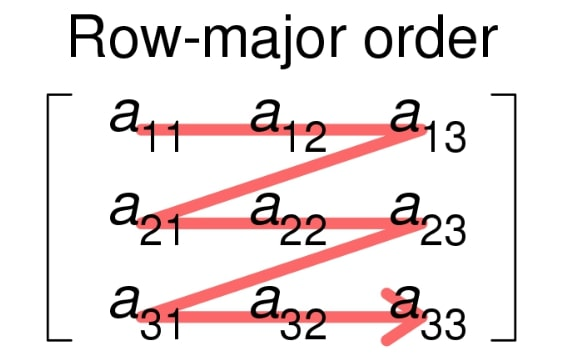

In [1]:
import numpy as np

a=np.array([[1,2,3],[4,5,6]])
b=a*2
print(a,'\n',b)
print(np.concatenate((a,b))) # po default je spajanje axis=0, spajanje po vrstama
print(np.concatenate((a,b),axis=1)) #spajanje po axis=1

[[1 2 3]
 [4 5 6]] 
 [[ 2  4  6]
 [ 8 10 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 2  4  6]
 [ 8 10 12]]
[[ 1  2  3  2  4  6]
 [ 4  5  6  8 10 12]]


In [24]:
a=np.array([1,2,3,4,5,6])
print(a)
print(a.reshape((2,3))) #reshape po C order #order='C' default
print(a.reshape((2,3),order='F'))

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[[1 3 5]
 [2 4 6]]


## Korisna numpy metoda meshgrid()

Ova funkcija se koristi da napravi pravougaonu mrezu tacaka na osnovu dva 1D niza koji prate Dekartovo indeksiranje. Meshgrid je inspirisan funkcijom iz MATLAB-a.

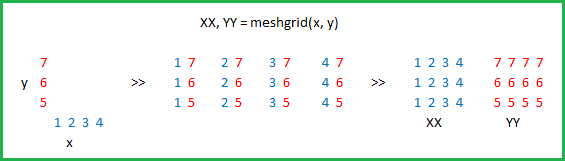

X koordinate:
[[-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]]

Y koordinate:
[[-5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]]


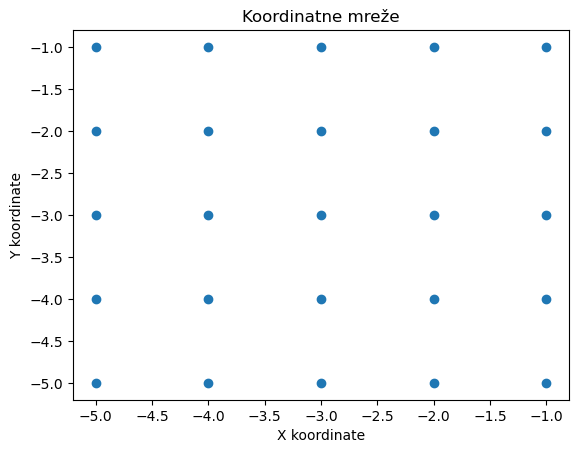

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, -1, 5)
y = np.linspace(-5, -1, 5)

# Generišemo koordinatne mreže pomoću meshgrid
X, Y = np.meshgrid(x, y)

# Prikazujemo rezultat
print("X koordinate:")
print(X)
print("\nY koordinate:")
print(Y)

# Prikazujemo tačke na grafiku
plt.scatter(X, Y)
plt.xlabel('X koordinate')
plt.ylabel('Y koordinate')
plt.title('Koordinatne mreže')
plt.show()


#### Ove matrice mogu se koristiti kao ulazne vrednosti za funkciju koja zavisi od dve promenljive. Na primer, ako imate funkciju z = f(X, Y), možete evaluirati vrednosti funkcije za svaku tačku na mreži tako što ćete koristiti matrice X i Y.

(5, 5)
[[-0.0052475  -0.00386885  0.01556126 -0.02288393  0.02932917]
 [-0.00386885  0.01723208 -0.00529407  0.04564726 -0.05655279]
 [ 0.01556126 -0.00529407 -0.04172151  0.03232054 -0.05440211]
 [-0.02288393  0.04564726  0.03232054  0.12366978 -0.19178485]
 [ 0.02932917 -0.05655279 -0.05440211 -0.19178485  0.45464871]]
[[-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]]
[[-5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]]


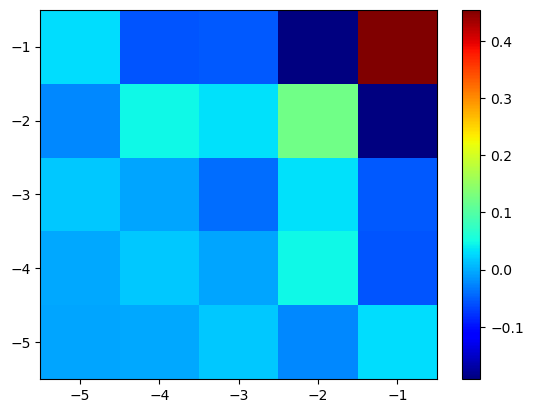

In [44]:
import matplotlib.pyplot as plt
from matplotlib import cm

z = np.sin(X**2 + Y**2) / (X**2 + Y**2)
print (z.shape)
print (z)
print(X)
print(Y)

#CRTANJE POMOCU PCOLORMESH
plt.pcolormesh(x,y,z,cmap=cm.jet) #rainbow, viridis
plt.colorbar()

[matplotlib.pyplot.cmap()](https://matplotlib.org/stable/api/cm_api.html) <br>
[matplotlib.pyplot.pcolormesh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html)

(5, 5)
[[-0.0052475  -0.00386885  0.01556126 -0.02288393  0.02932917]
 [-0.00386885  0.01723208 -0.00529407  0.04564726 -0.05655279]
 [ 0.01556126 -0.00529407 -0.04172151  0.03232054 -0.05440211]
 [-0.02288393  0.04564726  0.03232054  0.12366978 -0.19178485]
 [ 0.02932917 -0.05655279 -0.05440211 -0.19178485  0.45464871]]
[[-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]
 [-5. -4. -3. -2. -1.]]
[[-5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]]


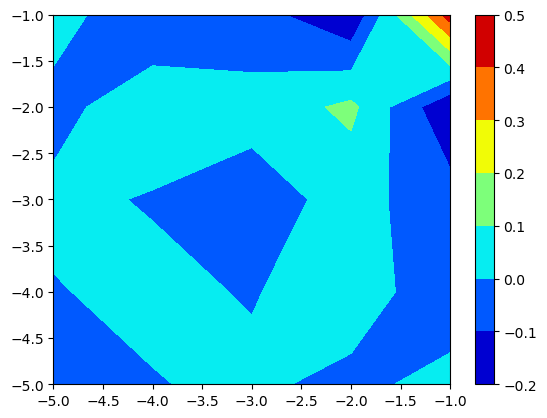

In [50]:
#CRTANJE POMOCU CONTOUR
import matplotlib.pyplot as plt
from matplotlib import cm

z = np.sin(X**2 + Y**2) / (X**2 + Y**2)
print (z.shape)
print (z)
print(X)
print(Y)
#plt.contour(x,y,z,cmap=cm.jet) 
plt.contourf(x,y,z,cmap=cm.jet) 
plt.colorbar(); #plt.axis('off')

[matplotlib.pyplot.colorf()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)

### Vezba1: Dopuniti postojeci kod. Izracunati divergenciju brzine vetra na pravilnoj mrezi tacaka (20x20 tacaka duz x i y pravca). X osa bi isla od 0 do 2, a y osa od 0 do 1.  <br> Polje brzine se menja po sledecem zakonu: <br> u=sin(x); v=sin(y) gde x i y predstavlja koordinatu na mrezi tacaka u kojoj se predstavlja data komponenta vetra. Divergenciju vetra racunati pomocu numpy metoda [np.gradient()](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html), gde cete zatim divergenciju dobiti na osnovu jednacine divergence=du_dx+dv_dy. <br> <br> Zatim nacrtati dva grafika jedan ispod drugog. Na prvom grafiku predstavite polje brzine vetra na mrezi tacaka pomocu metode [plt.quiver()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html). Na drugom grafiku predstaviti polje divergencije brzine vetra pomocu metode [plt.pcolormesh()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html). <br> <br> Posediti velicinu slike pomocu [plt.figure(figsize=(12,6))](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) <br> <br> [plt.subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)


In [49]:




#izracunavanje parcijalnih izvoda pomocu np.gradient()
du_dx, du_dy = np.gradient(u, axis=(1, 0))  
#0 je gradijent po vrstama, 1 po kolonama, po defaultu je axis=(0,1)
#po defaultu bi bilo du_dy, du_dx=np.gradient(u)
dv_dx, dv_dy = np.gradient(v, axis=(1, 0))



# Pandas biblioteka

## I) Uvod

Pandas je relativno nov paket za Python. Omogućava nam čitanje složenijih formata datoteka od NumPy-ja i manipulaciju podacima na moćan i brzi način. Takođe pruža mnogo korisnih alata za analizu podataka. Poseduje funkcije za analizu, sredjivanje i manipulaciju velikog broja podataka. Pandas takođe moze da izbriše redove koji nisu relevantni ili sadrže pogrešne vrednosti, kao što su prazne ili NULL vrednosti. Ovo se zove *čišćenje podataka*. I redovi i kolone imaju indekse, a operacije možete vršiti na redovima ili kolonama odvojeno.

Pandas biblioteka je izgradjena na osnovu NumPy biblioteke tako da prilikom instalacije Pandas moramo imati odredjenu verziju NumPy (zavisnost Pandas od Numpy).

Ime je dobio po *"**Pan**el Data"* i *"Python **D**ata **A**nalysi**s**"* i napravljen je od strane Wes McKinney 2008 godine.

Veoma je koristan u data science (nauka o podacima). Nauka o podacima: je grana računarske nauke u kojoj proučavamo kako da skladištimo, koristimo i analiziramo podatke za dobijanje informacija iz njih.

Postoje dve osnovne strukture podataka  u Pandas-u, **DataFrame**, koji je suštinski tabela sa više kolona, dok je **Series** jedna kolona podataka. Series je kao lista ili niz na steroidima.

In [56]:
import pandas as pd
df=pd.read_csv('ifile/Beograd.txt',delim_whitespace=True)
df.head()


%year  month  day  Tmax  Tmin   Tsr   RR   SS  Nsr  Hs     Psr  D07  F07   
0   1961      1    1   4.3   1.8   2.8  0.0  0.0  8.7   0  1003.9   16  0.8  \
1   1961      1    2   7.7   1.2   5.8  0.0  0.0  9.3   0   999.4   10  6.7   
2   1961      1    3  15.4   5.5  10.1  0.0  7.7  2.0   0   995.5    8  4.3   
3   1961      1    4  13.9   6.6  10.9  0.0  4.3  6.7   0   990.5   10  6.7   
4   1961      1    5  11.3   6.3   7.5  0.2  2.2  7.0   0   997.5   24  2.4   

   D14  F14  D21  F21  Usr  Esr  
0   20  0.8    6  2.4   85  6.5  
1   10  6.7    8  6.7   76  6.9  
2   10  2.4   12  4.3   67  8.3  
3   10  9.3   10  9.3   64  8.2  
4    2  2.4    8  0.8   83  8.6

In [58]:
print(type(df)) # ovo je Data Frame!

<class 'pandas.core.frame.DataFrame'>


### Napomena: pd.read_csv( ) cita format comma separated (csv) gde je zaraz delimiter. Medjutim nas txt fajl je whitespace delimited (whitespace podrazumeva 1 space razmak ili 1 tab). Argument delim_whitespace=True ce da podeli kolone i vrste na osnovu whitespace delimitera.

### Pandas moze da cita i excel format podataka. Za čitanje Excel podataka u Pandas, možete koristiti funkciju pandas.read_excel(). df = pd.read_excel(excel_path) <br> Pre nego što to uradite, trebaće vam instaliran Pandas i neki modul za rad sa Excel datotekama, poput **openpyxl ili xlrd**. Možete ih instalirati pomoću pip komandi: <br> *pip install pandas openpyxl ili conda install pandas openpyxl* <br> **Ovo je vec instalirano na studentskom serveru!** 

Data Frame je "kontejner podataka" koji je sofisticiraniji od tipa podataka koji smo do sad ucili (liste, zapisi(tuples), setovi, recnici, nizovi)).
Data Frame ima imenovane kolone (kao u Excel tabelama) i identifikuje vrste pomocu indeksa koji pocinje sa 0.

In [59]:
df.columns

Index(['%year', 'month', 'day', 'Tmax', 'Tmin', 'Tsr', 'RR', 'SS', 'Nsr', 'Hs',
       'Psr', 'D07', 'F07', 'D14', 'F14', 'D21', 'F21', 'Usr', 'Esr'],
      dtype='object')

Svaka od ovih kolona predstavlja *Pandas Series*. Data Frame je kao Excel tabela dok je Series kao jedna kolona u Excel tabeli.


In [67]:
df.columns=(['year', 'month', 'day', 'Tmax', 'Tmin', 'Tsr', 'RR', 'SS', 'Nsr', 'Hs',
       'Psr', 'D07', 'F07', 'D14', 'F14', 'D21', 'F21', 'Usr', 'Esr']) #promena imena kolone
df

year  month  day  Tmax  Tmin   Tsr    RR   SS  Nsr  Hs     Psr  D07   
0      1961      1    1   4.3   1.8   2.8   0.0  0.0  8.7   0  1003.9   16  \
1      1961      1    2   7.7   1.2   5.8   0.0  0.0  9.3   0   999.4   10   
2      1961      1    3  15.4   5.5  10.1   0.0  7.7  2.0   0   995.5    8   
3      1961      1    4  13.9   6.6  10.9   0.0  4.3  6.7   0   990.5   10   
4      1961      1    5  11.3   6.3   7.5   0.2  2.2  7.0   0   997.5   24   
...     ...    ...  ...   ...   ...   ...   ...  ...  ...  ..     ...  ...   
21895  2020     12   27   4.6   0.8   3.3   0.8  0.0  8.0   0   995.0   16   
21896  2020     12   28  12.2   3.8  10.8   0.0  0.7  6.0   0   983.4   14   
21897  2020     12   29  14.8   8.2  11.0   2.3  6.7  4.7   0   988.8   16   
21898  2020     12   30  14.0   8.8   9.8   0.0  0.7  9.3   0   990.0   14   
21899  2020     12   31   9.1   4.6   6.5  10.3  0.0  9.7   0   991.7   16   

       F07  D14  F14  D21  F21  Usr   Esr  
0      0.8   20  0.8    6  2.4   85   6.5  
1      6.7   10  6.7    8  6.7   76   6.9  
2      4.3   10  2.4   12  4.3   67   8.3  
3      6.7   10  9.3   10  9.3   64   8.2  
4      2.4    2  2.4    8  0.8   83   8.6  
...    ...  ...  ...  ...  ...  ...   ...  
21895  1.0   10  4.0   12  3.0   78   5.9  
21896  3.0   14  3.0   14  4.0   60   7.6  
21897  3.0   12  3.0   14  3.0   65   8.5  
21898  3.0   18  1.0   26  1.0   83  10.3  
21899  1.0   22  2.0   24  3.0   90   9.2  

[21900 rows x 19 columns]

In [69]:
#Cuvanje u fajlu
df.to_csv('proba.txt',sep='\t', index=False) #index=False sluzi da ne zapise kao prvu kolunu indekse ovog Data Frame.


In [72]:
df['year']

0        1961
1        1961
2        1961
3        1961
4        1961
         ... 
21895    2020
21896    2020
21897    2020
21898    2020
21899    2020
Name: year, Length: 21900, dtype: int64

In [73]:
df['temp_amplitude']=df['Tmax']-df['Tmin']
df

year  month  day  Tmax  Tmin   Tsr    RR   SS  Nsr  Hs     Psr  D07   
0      1961      1    1   4.3   1.8   2.8   0.0  0.0  8.7   0  1003.9   16  \
1      1961      1    2   7.7   1.2   5.8   0.0  0.0  9.3   0   999.4   10   
2      1961      1    3  15.4   5.5  10.1   0.0  7.7  2.0   0   995.5    8   
3      1961      1    4  13.9   6.6  10.9   0.0  4.3  6.7   0   990.5   10   
4      1961      1    5  11.3   6.3   7.5   0.2  2.2  7.0   0   997.5   24   
...     ...    ...  ...   ...   ...   ...   ...  ...  ...  ..     ...  ...   
21895  2020     12   27   4.6   0.8   3.3   0.8  0.0  8.0   0   995.0   16   
21896  2020     12   28  12.2   3.8  10.8   0.0  0.7  6.0   0   983.4   14   
21897  2020     12   29  14.8   8.2  11.0   2.3  6.7  4.7   0   988.8   16   
21898  2020     12   30  14.0   8.8   9.8   0.0  0.7  9.3   0   990.0   14   
21899  2020     12   31   9.1   4.6   6.5  10.3  0.0  9.7   0   991.7   16   

       F07  D14  F14  D21  F21  Usr   Esr  temp_amplitude  
0      0.8   20  0.8    6  2.4   85   6.5             2.5  
1      6.7   10  6.7    8  6.7   76   6.9             6.5  
2      4.3   10  2.4   12  4.3   67   8.3             9.9  
3      6.7   10  9.3   10  9.3   64   8.2             7.3  
4      2.4    2  2.4    8  0.8   83   8.6             5.0  
...    ...  ...  ...  ...  ...  ...   ...             ...  
21895  1.0   10  4.0   12  3.0   78   5.9             3.8  
21896  3.0   14  3.0   14  4.0   60   7.6             8.4  
21897  3.0   12  3.0   14  3.0   65   8.5             6.6  
21898  3.0   18  1.0   26  1.0   83  10.3             5.2  
21899  1.0   22  2.0   24  3.0   90   9.2             4.5  

[21900 rows x 20 columns]

### Da li mozemo ucitati txt fajl koji nema imena kolona?

In [52]:
import pandas as pd
df=pd.read_csv('ifile/Beograd_2021-2023.txt',delim_whitespace=True)
df.head()

2021  1   4.6
0  2021  2   6.8
1  2021  3   7.2
2  2021  4  10.5
3  2021  5  17.9
4  2021  6  23.8

### MOZEmo ali dodeljuje imena kolonama po default-u.

### 1. Pandas Data Series

In [3]:
import pandas as pd
a = [1, 7, 2]
myvar = pd.Series(a, index = ["x", "y", "z"])
myvar

x    1
y    7
z    2
dtype: int64

In [8]:
print(myvar[1]) #pristupamo odredjenom clanu Pandas Series

7


In [7]:
print(myvar['y']) #isto kao myvar[1] samo preko labele za indeks.

7


### 2. Pandas Data Frame

In [40]:
a=[1,7,2]
df=pd.DataFrame(a)
df

0
0  1
1  7
2  2

In [41]:
df=pd.DataFrame(a,columns=['values'])
df

values
0       1
1       7
2       2

In [42]:
df['values'] #pristupamo odredjenoj Pandas DataSeries unutar DataFrama

0    1
1    7
2    2
Name: values, dtype: int64

In [43]:
df['values'][1]

7

In [85]:
import numpy as np
import pandas as pd

minutes=np.linspace(0,180,181)
#print(minutes)
velocity=np.random.choice(60,181)
print(velocity.shape,'\n',velocity)
df=pd.DataFrame([minutes,velocity]).transpose()
df.columns=['minutes','velocity'] #atribut pd.DataFrame!
df

(181,) 
 [ 3 10  9 10 27 15 44 20 52 13  9  9 38 20 25 50 15 36 20 32  4  3 41  2
 50 34 51 21 35  6  8 45 57 57 46 22  3 10 51  4 16 23  1 18 48 12 31 39
 43 37 56 59 12 16 31 29 21 46 34 34 42 46  1 22 58 43 43 58  4  5 28 50
 22 45  5 49 21 23 29 51 19 21 49 35 20 51 31  7 27 20  3 37 27 11 47 22
 42  2 58 35  8  6 45 17 29  0 51 34 25 52 43 52 33 37 56 26 34 14  9 45
 27 40 22 39 54 59 58 40 27 46 13 10 25 31 18 36 35  2 28 36 11 53  9 32
 48 44 34 24 31 25 49 54  6  1 18 18 21 29 58 54  2 38 55 10 57 20 20 23
 20 28 57  0 43 47  4 47 34 22 29  7 11]


minutes  velocity
0        0.0       3.0
1        1.0      10.0
2        2.0       9.0
3        3.0      10.0
4        4.0      27.0
..       ...       ...
176    176.0      34.0
177    177.0      22.0
178    178.0      29.0
179    179.0       7.0
180    180.0      11.0

[181 rows x 2 columns]

## II) Filter Pandas DataFrame

In [45]:
df

minutes  velocity
0        0.0      45.0
1        1.0      25.0
2        2.0      30.0
3        3.0       5.0
4        4.0      16.0
..       ...       ...
176    176.0      31.0
177    177.0      50.0
178    178.0      12.0
179    179.0      14.0
180    180.0      58.0

[181 rows x 2 columns]

Mozemo pristupiti odredjenoj DataFrame preko 2 nacina. Jedan je da se koristi ime DataSeries kao **kljuc** (kao u recnicima). Ili da koristimo ime DataSeries kao **atribut** DataFrame. <br>
Iako su ova dva načina pristupa seriji identična, oni su zaista identični samo ako u nazivu kolone nema razmaka. Ako (kao i većina korisnika Excel-a) volite da stavljate razmake u nazive kolona, onda možete da koristite **samo prvi obrazac**.


In [46]:
df['minutes'].head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: minutes, dtype: float64

In [47]:
df.minutes.head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: minutes, dtype: float64

In [49]:
df.minutes.dtype

dtype('float64')

In [51]:
print(type(df),type(df.minutes)) #vidi razliku!

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


#### Serija **df.minutes** su brojevi sa pokretnim zarezom, ali imaju **indekse** (koji počinju sa 0) tako da su kao nizovi i liste, ali nisu ista stvar. Bez brige - možete pretvoriti seriju u niz pomoću ove komande (samo štampam prvih 10 elemenata...)

In [53]:
df.minutes.values #atribut values

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [54]:
type(df.minutes.values)

numpy.ndarray

In [55]:
array=df.minutes.values
print(array[0:10])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [58]:
#ili drugi nacin pretvaranje u listu!
array=df.minutes.tolist()
print (array[0:10],'\n',type(array))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] 
 <class 'list'>


### Maskiranje pd.DataFrame <br> <br> DataFrame.Series[condition]

In [64]:
df.minutes<3

0       True
1       True
2       True
3      False
4      False
       ...  
176    False
177    False
178    False
179    False
180    False
Name: minutes, Length: 181, dtype: bool

In [65]:
df[df.minutes<3]

minutes  velocity
0      0.0      45.0
1      1.0      25.0
2      2.0      30.0

In [67]:
df.tail() #df.head()

minutes  velocity
176    176.0      31.0
177    177.0      50.0
178    178.0      12.0
179    179.0      14.0
180    180.0      58.0

In [70]:
print(df.velocity.max()) #metod max() ima zagrade, atributi nemaju!!
df.velocity.min()

59.0


0.0

In [72]:
df.minutes[df.velocity==df.velocity.max()] 

92      92.0
105    105.0
142    142.0
160    160.0
166    166.0
Name: minutes, dtype: float64

### Slozeniji if uslovi za maskiranje <br> <br> DataFrame.Series[(condition_1) | (condition_2) ] uslov ILI <br> DataFrame.Series[(condition_1) & (condition_2) ] USLOV I <br> DataFrame.Series[(condition_1) & ~(condition_2) ] Znak ~ oznacava operator NOT





In [74]:
df.to_csv('proba.txt',sep='\t', index=False)

In [77]:
print(df.velocity.mean(),'\n',df.velocity.max())

30.751381215469614 
 59.0


In [76]:
df[(df.velocity>df.velocity.mean()) & (df.velocity<df.velocity.max())]

minutes  velocity
0        0.0      45.0
6        6.0      53.0
8        8.0      41.0
11      11.0      47.0
12      12.0      57.0
..       ...       ...
172    172.0      36.0
173    173.0      40.0
176    176.0      31.0
177    177.0      50.0
180    180.0      58.0

[82 rows x 2 columns]

## III) Formatiranje stringova u Pandas

In [86]:
df['minutes']=df['minutes'].astype('int')
df

minutes  velocity
0          0       3.0
1          1      10.0
2          2       9.0
3          3      10.0
4          4      27.0
..       ...       ...
176      176      34.0
177      177      22.0
178      178      29.0
179      179       7.0
180      180      11.0

[181 rows x 2 columns]

In [89]:
df['velocity']=df['velocity'].round(2) #mogu da koristim metode koje smo ranije ucili
df

minutes  velocity
0          0       3.0
1          1      10.0
2          2       9.0
3          3      10.0
4          4      27.0
..       ...       ...
176      176      34.0
177      177      22.0
178      178      29.0
179      179       7.0
180      180      11.0

[181 rows x 2 columns]

### Vezba 2: U fajlu ifile/Beograd.txt prebrojati broj dana kada je srednja dnevna temperatura tokom 1961. godine bila iznad 90. percetila za tu godinu. <br> 90. percentil se racuna kao [DataSeries.quantile(0.9)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html). Napraviti kao konacan rezultat pandas DataFrame sa sledecim kolonama: 'year','month','day','Tsr>T90p' <br> <br> Koristiti metod [DataFrame.loc()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) i [DataFrame.index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html)

In [153]:
#temp90 su Tsr vece od 90.percentila u 1961. godini

#print(temp90.index)
month=df['month'].loc[temp90.index]
year=df['year'].loc[temp90.index]
day=df['day'].loc[temp90.index]

